<a href="https://colab.research.google.com/github/PsorTheDoctor/Sekcja-SI/blob/master/MLP/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasyfikator wieloklasowy - Digit Recognition

### 1.1 Import bibliotek

In [1]:
# Istnieje tylko w Google Colab
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

'2.1.0-rc1'

### 1.2 Załadowanie i przygotowanie danych

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'X_test shape: {X_test.shape}')

11493376/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
X_test shape: (10000, 28, 28)


In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [5]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [0]:
X_train = X_train / 255.
X_test = X_test / 255.

### 1.3 Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

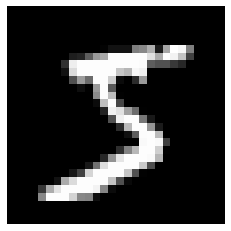

In [8]:
# cmap='grey_r' odwraca kolor
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')

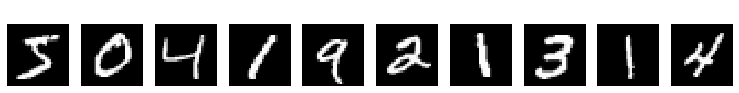

In [10]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray')
  plt.title(y_train[i-1], color='white', fontsize=16)

### 1.4 Budowa sieci neuronowej

In [13]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 1.5 Trenowanie modelu

In [32]:
history = model.fit(X_train, y_train, epochs=8)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0220 - accuracy: 0.9924
Epoch 2/8
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0212 - accuracy: 0.9928
Epoch 3/8
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0224 - accuracy: 0.9925
Epoch 4/8
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0214 - accuracy: 0.9927
Epoch 5/8
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0221 - accuracy: 0.9927
Epoch 6/8
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0209 - accuracy: 0.9925
Epoch 7/8
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0192 - accuracy: 0.9935
Epoch 8/8
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0204 - accuracy: 0.9929


### 1.6 Ocena modelu

In [33]:
model.evaluate(X_test, y_test, verbose=2)

10000/10000 - 0s - loss: 0.0891 - accuracy: 0.9803


[0.08912910321544669, 0.9803]

In [34]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.022033,0.992433
1,0.021245,0.992833
2,0.022446,0.992467
3,0.021420,0.992683
4,0.022123,0.992683
5,0.020883,0.992500
6,0.019204,0.993500
7,0.020409,0.992867


In [35]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

### 1.7 Predykcja na podstawie modelu

In [36]:
model.predict(X_test)

array([[0.000000000009, 0.            , 0.000000000001, ..., 0.9999987     , 0.000000000002, 0.000000091644],
       [0.            , 0.000000000065, 1.            , ..., 0.            , 0.            , 0.            ],
       [0.000000000002, 0.9999902     , 0.000000180158, ..., 0.000001359846, 0.000008137569, 0.000000000001],
       ...,
       [0.            , 0.            , 0.            , ..., 0.000000012842, 0.000000000021, 0.000000001413],
       [0.            , 0.            , 0.            , ..., 0.            , 0.000000038559, 0.            ],
       [0.            , 0.            , 0.000000000005, ..., 0.            , 0.            , 0.            ]],
      dtype=float32)

In [37]:
y_pred = model.predict_classes(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [38]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [39]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([115, 247, 321, 340, 381, 445, 449, 495, 582, 619], dtype='int64')

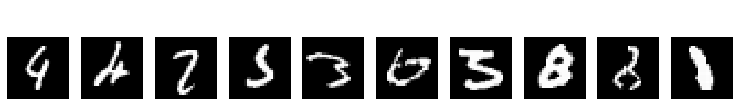

In [40]:
plt.figure(figsize=(13, 13))
for i, j in zip(range(1, 11), misclassified.index[:10]):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_test[j], cmap='gray')
  plt.title('_test: ' + str(y_test[j]) + '\n' + 'y_pred: ' + str(y_pred[j]), color='white', fontsize=12)
plt.show()